# Clasificación para clasificar a los pingüinos Chinstrap, Gentoo y Adelie

Para el entrenamiento de este modelo, utilizaré el dataset ["🐧 Palmer Penguins for binary classification"](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification/data) obtenido de Kaggle. 


El dataset utilizado en este estudio contiene información detallada sobre diferentes especies de pingüinos recopilada durante un estudio científico en la región de la Antártida. Este conjunto de datos, denominado "Penguins", incluye mediciones físicas y características demográficas de pingüinos de tres especies: Adelie, Chinstrap y Gentoo. Estas mediciones incluyen la longitud y profundidad del pico, la longitud de la aleta, la masa corporal, la isla donde fueron observados y el sexo del pingüino.

![Pingüinos](pngns.jpg)


El objetivo de este proyecto es construir un modelo de clasificación que pueda predecir con precisión la especie de un pingüino en función de sus características físicas y demográficas. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Visualización de los datos

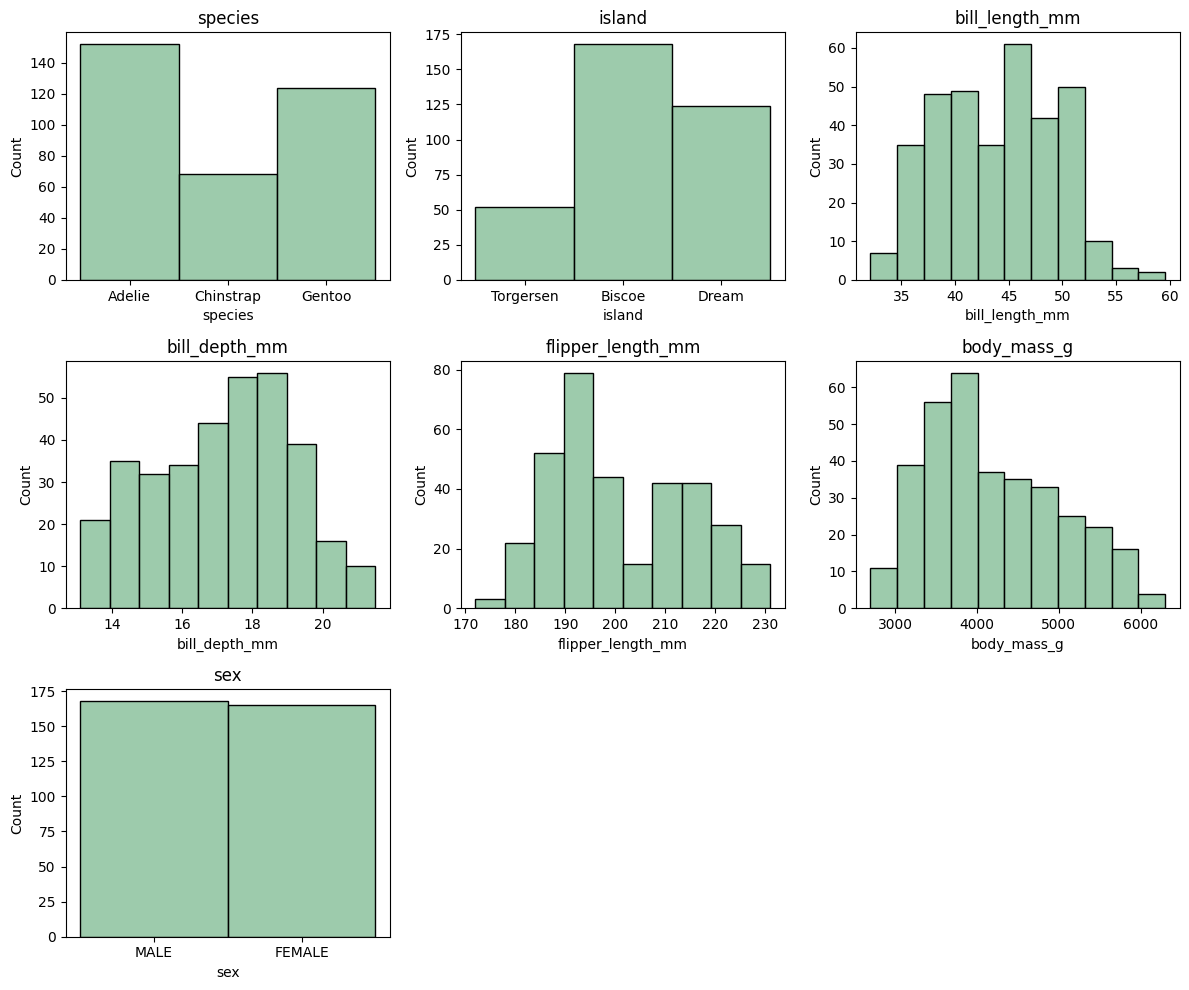

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('crest') 

plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


## Preprocesamiento

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
df = df.rename(columns={'bill_length_mm': 'billLength',
                        'bill_depth_mm': 'billDepth',
                        'flipper_length_mm': 'flipperLength',
                        'body_mass_g': 'bodyMass'})
df

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Antes de utilizar un encoder para las columnas con clases específicas, revisaré la existencia de valores faltantes o nulos

In [6]:
df.count()

species          344
island           344
billLength       342
billDepth        342
flipperLength    342
bodyMass         342
sex              333
dtype: int64

In [7]:
df.isnull().sum()

species           0
island            0
billLength        2
billDepth         2
flipperLength     2
bodyMass          2
sex              11
dtype: int64

A pesar de que la cantidad de valores faltantes/nulos no es significativa, reemplazaré dichos valores con la media de cada columna:

In [8]:

df['billLength'].fillna(df['billLength'].mean(), inplace=True)
df['billDepth'].fillna(df['billDepth'].mean(), inplace=True)
df['flipperLength'].fillna(df['flipperLength'].mean(), inplace=True)
df['bodyMass'].fillna(df['bodyMass'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21896\3711378363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['billLength'].fillna(df['billLength'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21896\3711378363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

En el caso de la columna 'sex' utilizaré la moda en lugar de la media

In [9]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_21896\2137331039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

species          0
island           0
billLength       0
billDepth        0
flipperLength    0
bodyMass         0
sex              0
dtype: int64

In [11]:
df.sample(10)

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,MALE
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,FEMALE
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,MALE
213,Chinstrap,Dream,46.8,16.5,189.0,3650.0,FEMALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,MALE
281,Gentoo,Biscoe,46.2,14.9,221.0,5300.0,MALE
94,Adelie,Dream,36.2,17.3,187.0,3300.0,FEMALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


Ahora que no existen valores nulos ni faltantes, utilizaré el label encoder para las colummas: 'species', 'island' y 'sex'

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])

In [13]:
df.sample(10)

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
9,0,2,42.0,20.2,190.0,4250.0,1
104,0,0,37.9,18.6,193.0,2925.0,0
46,0,1,41.1,19.0,182.0,3425.0,1
316,2,0,49.4,15.8,216.0,4925.0,1
317,2,0,46.9,14.6,222.0,4875.0,0
220,2,0,46.1,13.2,211.0,4500.0,0
186,1,1,49.7,18.6,195.0,3600.0,1
216,1,1,43.5,18.1,202.0,3400.0,0
31,0,1,37.2,18.1,178.0,3900.0,1
275,2,0,45.0,15.4,220.0,5050.0,1


## Definiendo y separando las variables independientes de la dependiente (species)

In [14]:
X = df.drop(['species'], axis=1)
y = df['species']

X

,island,billLength,billDepth,flipperLength,bodyMass,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,1
340,0,46.80000,14.30000,215.000000,4850.000000,0
341,0,50.40000,15.70000,222.000000,5750.000000,1
342,0,45.20000,14.80000,212.000000,5200.000000,0


## División del dataset entre entrenamiento y prueba

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

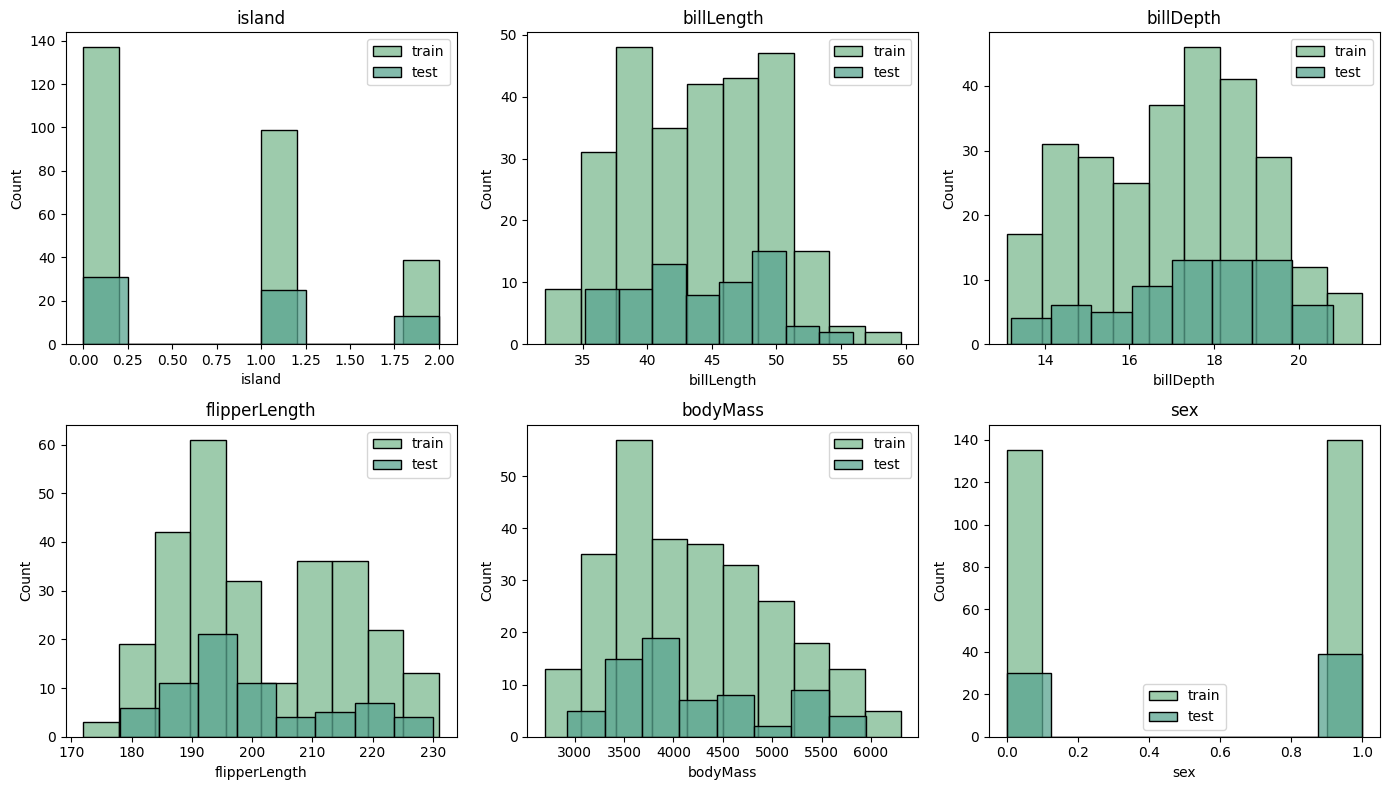

In [16]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(X.columns, 1):
    sns.set_palette('crest') 
    plt.subplot(2, 3, i)
    sns.histplot(xtrain[column],  label='train')
    sns.histplot(xtest[column],  label='test')
    plt.title(column)
    plt.legend()
plt.tight_layout()
plt.show()

## Escalamiento

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

xtrain_scaled

array([[-0.89862768, -1.51790052, -0.43753238, -0.43352258, -1.06446304,
        -1.01835015],
       [-0.89862768,  0.53915607, -0.84256773,  0.97077264,  1.18198874,
         0.98198051],
       [ 1.89371821, -0.84435102,  1.28386784, -0.43352258,  0.58917507,
         0.98198051],
       ...,
       [-0.89862768, -0.95357526,  0.0687618 , -0.15266354, -0.56525154,
        -1.01835015],
       [-0.89862768,  0.50274799, -1.45012075,  0.61969883,  0.80758011,
        -1.01835015],
       [-0.89862768, -1.11741163, -0.53879122, -1.27609971, -1.40767095,
        -1.01835015]])

# Prueba de distintos modelos
## Regresión logística


Entrenamiento

In [18]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(xtrain_scaled, ytrain)


LogisticRegression()

Predicciones

In [19]:
y_pred_log_reg = logReg.predict(xtest_scaled)

Score

In [20]:
from sklearn.metrics import classification_report, accuracy_score

print("Score: ", logReg.score(xtest_scaled, ytest))

Score:  0.9855072463768116


Matriz de confusión

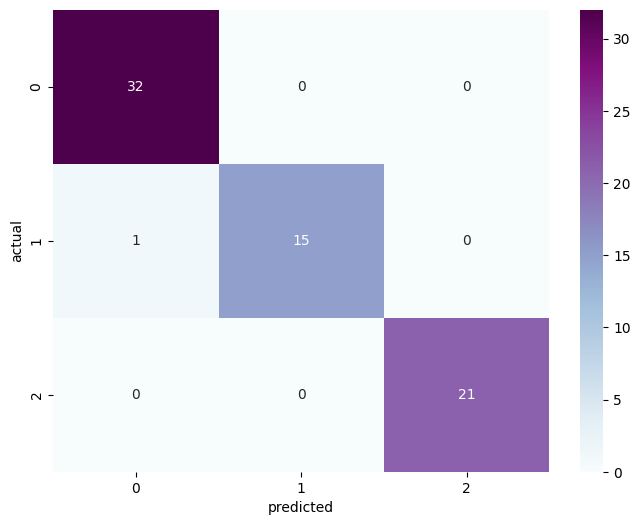

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(ytest, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


## SVM

Entrenamiento

In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(xtrain, ytrain)


SVC()

Predicciones

In [23]:
y_pred_svm = svm_model.predict(xtest)

Score

In [24]:
print("Accuracy:", accuracy_score(ytest, y_pred_svm))

Accuracy: 0.6811594202898551


Matriz de confusión

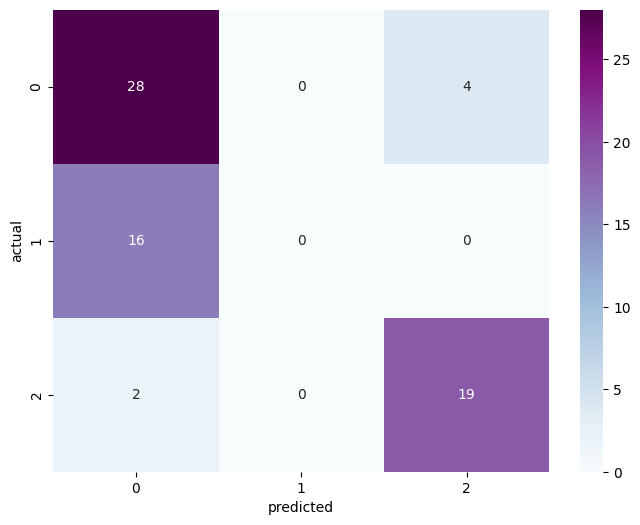

In [25]:
conf_mat = confusion_matrix(ytest, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Buscando el mejor kernel para entrenar el modelo

In [26]:
from sklearn.model_selection import GridSearchCV

classifier = SVC()

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search = grid_search.fit(xtrain, ytrain)
best_accuracy = grid_search.best_score_
print("el accuracy más alto es: ", best_accuracy)

best_parameters = grid_search.best_params_
print("los mejores parámetros son:", best_parameters)


el accuracy más alto es:  0.989090909090909
los mejores parámetros son: {'C': 1, 'kernel': 'linear'}


## Utilizando los mejores parámetros para entrenar el modelo

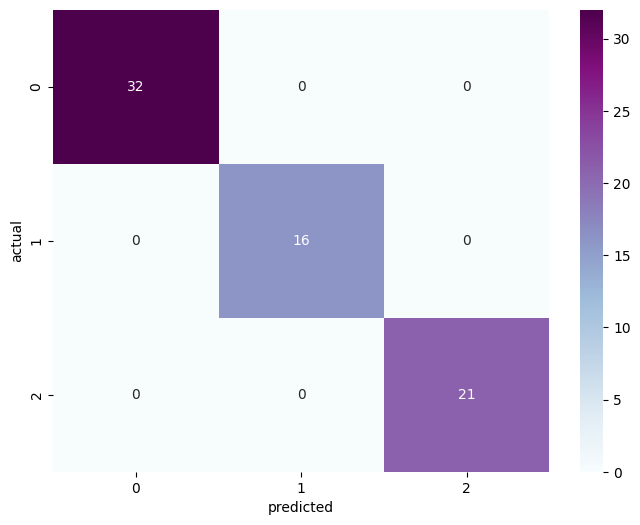

In [27]:
svm_model = SVC(C=1,kernel='linear')
svm_model.fit(xtrain, ytrain)

y_pred_svm = svm_model.predict(xtest)

conf_mat = confusion_matrix(ytest, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Comparación de los modelos

In [28]:
from sklearn.metrics import classification_report
import pandas as pd

# reportes de clasificación
report_log = classification_report(ytest, y_pred_log_reg, output_dict=True)
report_svm = classification_report(ytest, y_pred_svm, output_dict=True)

metrics = ['precision', 'recall', 'f1-score', 'accuracy']
models = ['Regresión Logística', 'SVM (kernel linear)']


data = {
    'Modelo': models,
    'Precision': [report_log['weighted avg']['precision'], report_svm['weighted avg']['precision']],
    'Recall': [report_log['weighted avg']['recall'], report_svm['weighted avg']['recall']],
    'F1-Score': [report_log['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score']],
    'Accuracy': [accuracy_score(ytest, y_pred_log_reg), accuracy_score(ytest, y_pred_svm)]
}

metrics = pd.DataFrame(data)
metrics




,Modelo,Precision,Recall,F1-Score,Accuracy
0,Regresión Logística,0.985946,0.985507,0.985385,0.985507
1,SVM (kernel linear),1.000000,1.000000,1.000000,1.000000


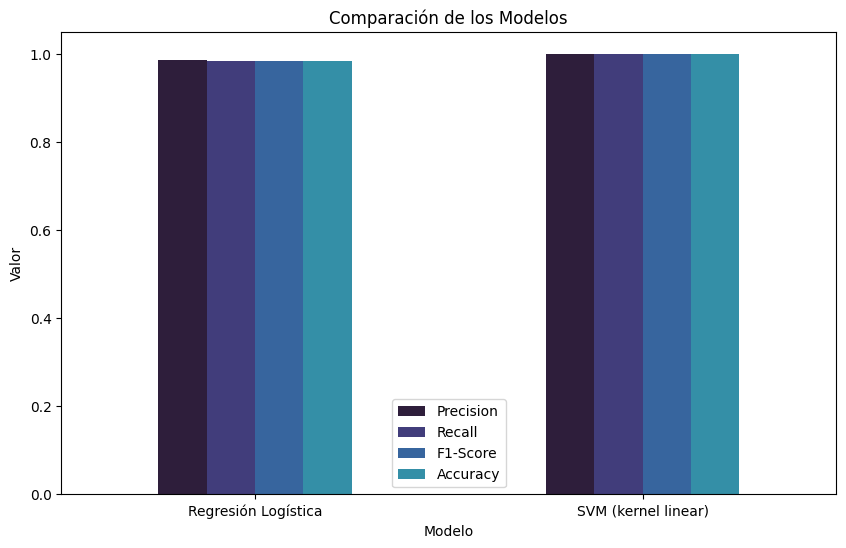

In [29]:
import matplotlib.pyplot as plt

sns.set_palette('mako') 
metrics.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de los Modelos')
plt.ylabel('Valor')
#plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()
